# TRẢ LỜI CHO CÂU HỎI 4: 
- **Giữa ban tự nhiên và ban xã hội thì ban nào có nhiều thí sinh lựa chọn nhất.**
- **Có thể dự đoán khối khi của các thí sinh hay không ?**
- **Có nên bỏ điểm ưu tiên khi thi xét điểm đại học hay không ?**

**Ý NGHĨA TRẢ LỜI CÂU HỎI:**
- Giúp ta biết được sự chênh lệch về lựa chọn ban tự nhiên và ban xã hội, từ đó có thể đánh giá sự khắc nghiệt trong thi THPTQG.
- Dự đoán khối thi giúp ta có thể biết số lượng thí sinh mỗi năm của 1 khối, từ đó ta có thể đánh giá được sự thay đổi về số lượng thí sinh của các khối thi qua từng năm, có thay đổi gì không, vì sao thay đổi như thế. Từ đó đánh giá chất lượng đề thi của khối đó so với các năm khác.
- Điểm ưu tiên có giúp ích cho việc đánh giá chính xác chất lượng của mỗi thí sinh hay không ? Hay chỉ làm cho phân bổ điểm bị sai lệch ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
# import những thư viện cần thiết

Đọc dữ liệu từ file `..\data\score_college_exam_data.csv` và lưu vào biến `df`

In [2]:
# Đọc và in ra thử 5 giá trị đầu của file
df = pd.read_csv('../data/score_college_exam_data.csv', index_col = 'Unnamed: 0')
df.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
0,2019,24008611,8.2,8.00,7.6,NaN,NaN,NaN,8.25,7.75,8.75
1,2019,51000032,8.6,6.17,8.0,8.25,4.5,6.0,NaN,NaN,NaN
2,2019,51000005,5.2,4.75,NaN,NaN,NaN,NaN,4.00,4.25,5.75
3,2019,51000021,4.4,4.50,NaN,NaN,NaN,NaN,2.25,4.75,5.00
4,2019,51000013,5.8,6.00,4.4,NaN,NaN,NaN,7.75,8.25,7.50


## 1. Đâu là ban có nhiều thí sinh lựa chọn nhất ? 

Phân loại ban dựa vào các môn mà học sinh lựa chọn.
- Nếu thí sinh có 3 môn Lí Hóa Sinh không có điểm thì thí sinh sẽ thi ban xã hội.
- Nếu thí sinh có 3 môn Sử Địa GDCD không có điểm thì thí sinh sẽ thi ban tự nhiên

In [3]:
# Phân loại ban
# Xã hội
Social_Sciene = ['Su', 'Dia', 'GDCD']
# Tự nhiên
Nature_Sciene = ['Li', 'Hoa', 'Sinh']

Những thí sinh theo ban tự nhiên

In [4]:
nature_science_df = df.drop(Social_Sciene, axis = 1).dropna()
nature_science_df.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh
1,2019,51000032,8.6,6.17,8.0,8.25,4.50,6.00
5,2019,51000003,7.2,6.75,4.4,7.50,5.75,3.00
8,2019,51000007,5.6,4.50,2.2,5.50,3.50,3.75
14,2019,51000014,7.0,6.25,3.6,7.00,5.00,4.75
15,2019,51000019,7.8,7.25,8.8,8.00,6.75,6.25


Những thí sinh ban xã hội

In [5]:
social_science_df = df.drop(Nature_Sciene, axis = 1).dropna()
social_science_df.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Su,Dia,GDCD
0,2019,24008611,8.2,8.0,7.6,8.25,7.75,8.75
4,2019,51000013,5.8,6.0,4.4,7.75,8.25,7.50
7,2019,51000011,5.0,6.5,8.8,5.25,6.25,8.75
9,2019,51000010,6.6,7.0,5.2,3.25,7.50,8.50
10,2019,51000018,7.4,9.0,4.8,7.00,7.25,9.00


In [6]:
def committee(df):
    Social_Sciene = ['Su', 'Dia', 'GDCD']
    Nature_Sciene = ['Li', 'Hoa', 'Sinh']

    social_science_df = df.drop(Nature_Sciene, axis = 1).dropna()
    nature_science_df = df.drop(Social_Sciene, axis = 1).dropna()
    
    return social_science_df, nature_science_df

### Kiểm tra dữ liệu số lượng các thí sinh trong 4 năm
- Tính số lượng thí sinh ban tự nhiên và ban xã hội lần lược lưu vào biến `nature_candidates` và `social_candidates`.
- Nếu để ý, ta sẽ thấy tổng số lượng thí sinh ban tự nhiên và ban xã hội sẽ không bằng số lượng thí sinh tham gia kì thi, nguyên nhân là do đâu ?

In [7]:
nature_candidates = nature_science_df.shape[0]
social_candidates = social_science_df.shape[0]

# Tổng số lượng thí sinh 2 ban
candidates = nature_candidates + social_candidates

In [8]:
assert candidates < df.shape[0]

**Giải thích:** Nguyên do là do các trường hợp thí sinh tự do hoặc do bỏ thi.

### Trước khi đến với việc làm trên từng năm, ta hãy làm trước trên 4 năm liên tục.
Kiểm tra xem ban nào nhiều thí sinh hơn

In [9]:
if nature_candidates > social_candidates:
    print('Ban tự nhiên được yêu thích hơn !!')
elif social_candidates > nature_candidates:
    print('Ban xã hội được yêu thích hơn !!')
else:
    print('Số lượng thí sinh giữa 2 ban là như nhau !!')

Ban xã hội được yêu thích hơn !!


Sau khi có được câu trả lời thì ta cùng vẽ đồ thị ra để thấy được sự chênh lệch giữa 2 ban qua từng năm.

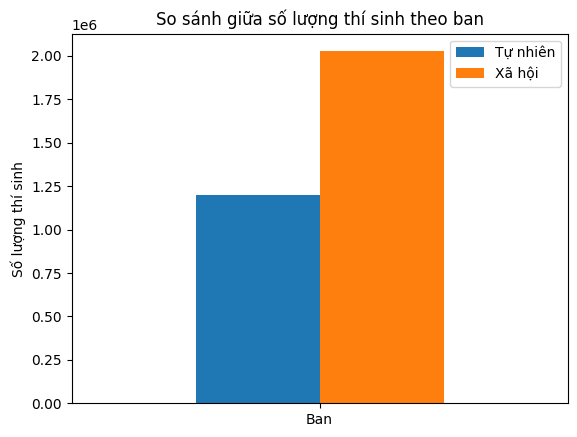

In [10]:
pd.DataFrame([[nature_candidates, social_candidates]], columns = ['Tự nhiên', 'Xã hội']).plot.bar()
plt.xticks([0], ['Ban'], rotation = 0)
plt.ylabel('Số lượng thí sinh')
plt.title('So sánh giữa số lượng thí sinh theo ban')
plt.show()

### Theo từng năm thì ban nào được các thí sinh yêu thích hơn:

**Chia theo từng năm và lưu vào dataframe mới tên là `score_<năm>_df`**

In [11]:
score_2019_df = df[df['Year'] == 2019]
score_2019_df.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
0,2019,24008611,8.2,8.00,7.6,NaN,NaN,NaN,8.25,7.75,8.75
1,2019,51000032,8.6,6.17,8.0,8.25,4.5,6.0,NaN,NaN,NaN
2,2019,51000005,5.2,4.75,NaN,NaN,NaN,NaN,4.00,4.25,5.75
3,2019,51000021,4.4,4.50,NaN,NaN,NaN,NaN,2.25,4.75,5.00
4,2019,51000013,5.8,6.00,4.4,NaN,NaN,NaN,7.75,8.25,7.50


In [12]:
score_2020_df = df[df['Year'] == 2020]
score_2020_df.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
0,2020,18014547,6.4,6.75,4.2,NaN,NaN,NaN,4.75,7.00,6.50
1,2020,18014530,7.6,6.00,2.8,NaN,NaN,NaN,3.75,7.75,7.75
2,2020,18014521,4.8,4.75,NaN,NaN,NaN,NaN,4.00,6.50,NaN
3,2020,18014517,8.0,7.00,5.8,NaN,NaN,NaN,8.25,8.00,9.50
4,2020,18014523,8.2,6.50,4.0,8.0,8.5,5.0,NaN,NaN,NaN


In [13]:
score_2021_df = df[df['Year'] == 2021]
score_2021_df.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
870486,2021,1000043,8.0,8.50,8.8,NaN,NaN,NaN,5.75,6.50,8.75
870487,2021,1000163,3.8,7.50,NaN,NaN,NaN,NaN,6.75,7.00,NaN
870488,2021,1000040,3.8,2.00,NaN,NaN,NaN,NaN,2.50,4.50,NaN
870489,2021,1000007,9.0,5.25,9.0,7.25,4.75,3.5,NaN,NaN,NaN
870490,2021,1000180,8.8,8.50,9.6,NaN,NaN,NaN,5.25,7.25,8.00


In [14]:
score_2022_df = df[df['Year'] == 2022]
score_2022_df.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
0,2022,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75
1,2022,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25
2,2022,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75
3,2022,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50
4,2022,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25


In [15]:
years = { '2019': score_2019_df,
          '2020': score_2020_df,
          '2021': score_2021_df,
          '2022': score_2022_df }

**Bây giờ dựa vào những dữ liệu và phương thức ở trên, ta hãy tính toán, minh họa và đưa ra kết luận**
- Tính số lượng thí sinh của ban Xã hội và Tự nhiên theo các năm.
- Vẽ hình, trực quan hóa dữ liệu.
- Kết luận gì qua các năm hay không ?

In [16]:
def shape_of_Committee(df):
    social_science_df, nature_science_df = committee(df)
    nature_candidates = nature_science_df.shape[0]
    social_candidates = social_science_df.shape[0]
    return nature_candidates, social_candidates

def compare2Committee(years):
    for year in years.keys():
        df = years[year]
        nature_candidates_year, social_candidates_year = shape_of_Committee(df)
        if nature_candidates_year > social_candidates_year:
            print('Năm ' + year + 'có ban tự nhiên được yêu thích hơn !!')
        elif social_candidates_year > nature_candidates_year:
            print('Năm ' + year + ' có ban xã hội được yêu thích hơn !!')
        else:
            print('Năm ' + year + 'có số lượng thí sinh giữa 2 ban là như nhau !!')
       
compare2Committee(years)

Năm 2019 có ban xã hội được yêu thích hơn !!
Năm 2020 có ban xã hội được yêu thích hơn !!
Năm 2021 có ban xã hội được yêu thích hơn !!
Năm 2022 có ban xã hội được yêu thích hơn !!


#### Trực quan hóa dữ liệu từng năm

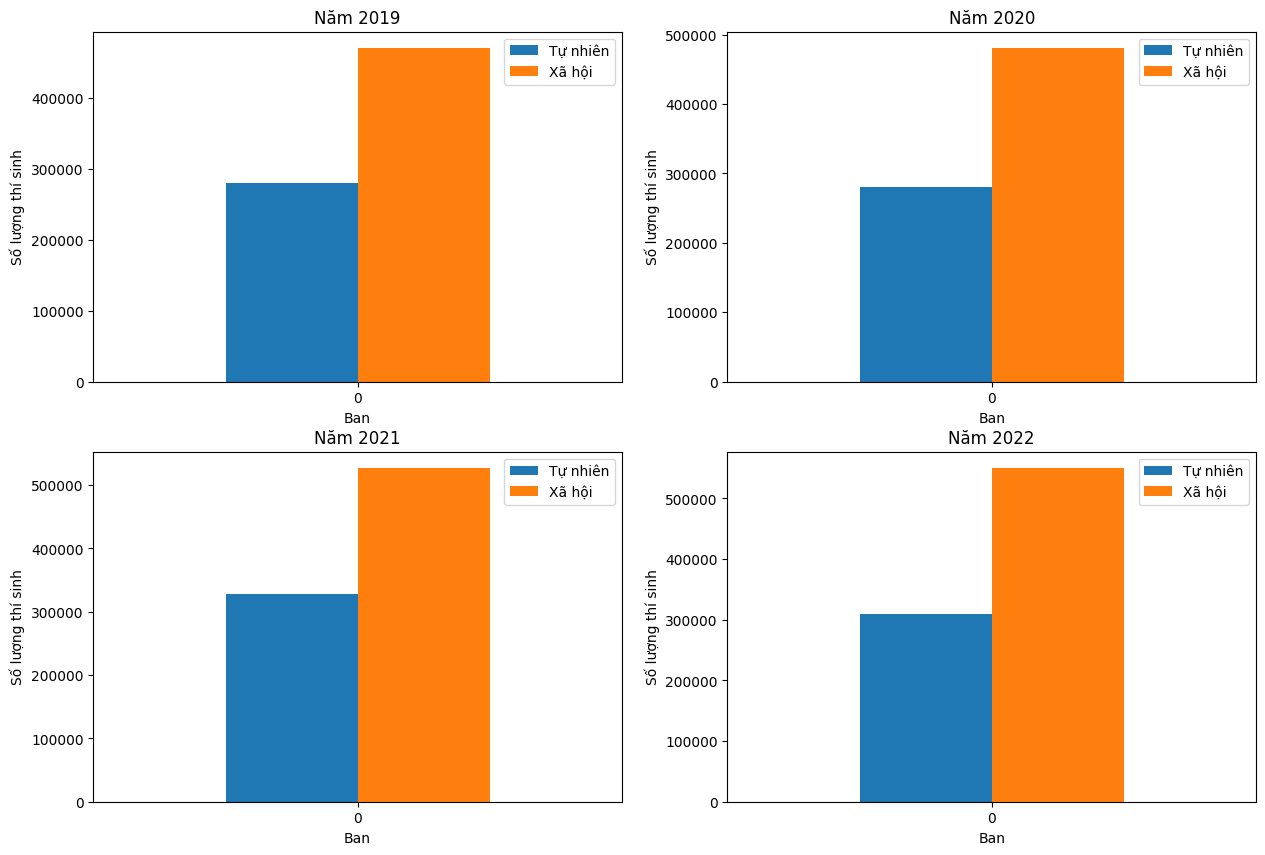

In [17]:
def visualization_committee(years):
    fig, axes = plt.subplots(2, 2, figsize = (15, 10))
    i = 0
    for year in years:
        df = years[year]
        nature, social = shape_of_Committee(df)
        x = i // 2
        y = i % 2
        pd.DataFrame([[nature, social]], 
                        columns = ['Tự nhiên', 'Xã hội']).plot.bar(ax = axes[x][y])

        axes[x][y].title.set_text('Năm ' + year)
        axes[x][y].set_xlabel('Ban')
        axes[x][y].set_ylabel('Số lượng thí sinh')
        axes[x][y].tick_params(labelrotation = 0)
        i += 1
    plt.show()
visualization_committee(years)

Để so sánh số lượng thí sinh của mỗi ban thì ta sẽ dùng biểu đồ cột để biểu diễn thay vì các biểu đồ khác, vì khi so sánh thì biểu đồ cột sẽ trực quan hóa rõ ràng nhất.

Chỉ khi ta xét tỉ lệ thí sinh thì ta sẽ dùng biểu đồ tròn để biểu diễn.

**Kết luận:** Ban xã hội là ban được yêu thích nhất so với ban tự nhiên xuyên suốt 4 năm

## 2. Dự đoán thí sinh sẽ chọn khối thi
- Dựa trên các khối thi đã vạch ra từ trước, ta hãy tính điểm của từng khối thi theo ban mà thí sinh có thể đạt được.
- Sau đó ta sẽ tìm điểm max của các khối thi mà thí sinh của ban đó có thể đạt được.
- Từ điểm max ta có thể kết luận được thí sinh đó chọn khối nào.

#### Dựa trên điểm số của mỗi thí sinh dự đoán xem thí sinh này nên chọn nguyện vọng theo khối nào là tốt nhất.
- Dựa vào kì vọng tốt nhất ở trên mà sẽ phân loại thí sinh đó thuộc về khối nào.
- Thông thường thí sinh sẽ quan tâm vào khối mà mình chọn nhất nên điểm của các môn thuộc khối mà thí sinh chọn sẽ cao hơn so với điểm các khối còn lại.
- Các khối thi được lựa chọn là các khối có đa số thí sinh tham gia.
- Các khối thi sẽ được phân thành 2 ban là ban Xã hội và ban Tự nhiên. Lưu ý, có khối D01 sẽ nằm ở cả 2 ban Xã hội và Tự nhiên vì khối D01 là Toán, Văn, Anh.  

#### Ta sẽ chia các khối : A, B, C, D
- Trong đó: 
  - Khối C00, C03, C04 thuộc về ban XÃ HỘI
  - Khối A00, A01, A02, B00, B08, C01, C02 thuộc về ban TỰ NHIÊN
  - Còn khối D01 sẽ thuộc về cả 2 ban.
- Tạo một dict với tên gọi là `chosen` là các khối mà thí sinh có thể sẽ lựa chọn

In [18]:
chosen = {
    # Ban tự nhiên
    'A00' : {'Toan', 'Li', 'Hoa'},
    'A01' : {'Toan', 'Li', 'Ngoai_ngu'},
    'A02' : {'Toan', 'Li', 'Sinh'}, 
    'B00' : {'Toan', 'Hoa', 'Sinh'},
    'B08' : {'Toan', 'Sinh', 'Ngoai_ngu'},
    'C01' : {'Van', 'Toan', 'Li'},
    'C02' : {'Van', 'Toan', 'Hoa'},

    # Ban xã hội
    'C00' : {'Van', 'Su', 'Dia'},  
    'C03' : {'Van', 'Toan', 'Su'},
    'C04' : {'Van', 'Toan', 'Dia'},

    # Khối D01 nằm ở giữa 2 ban
    'D01' : {'Toan', 'Van', 'Ngoai_ngu'}
}

**Tuy nhiên**: Dữ liệu chúng ta lưu là một dataframe, nên ta hạn chế vòng lặp tìm max và tìm khối thi có điểm là max.

In [19]:
def max_total_score_exam(score_df, chosen):
    df = score_df.copy()
    for key in chosen.keys():
        if chosen[key].issubset(df.columns):
            add = df[list(chosen[key])].sum(axis = 1)
            df.insert(8, key, add, True)

    max = df.iloc[:, 8:].max(axis = 1)
    idmax = df.iloc[:, 8:].idxmax(axis = 1)
    df.insert(df.shape[1], 'Điểm tổng', max, True)
    df.insert(df.shape[1], 'Khối thi dự đoán', idmax, True)
    return df
    

### Xử lý trước trên 4 năm
#### Kiểm tra dữ liệu sau khi dự đoán


In [20]:
social_score = max_total_score_exam(social_science_df, chosen)
social_score.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Su,Dia,GDCD,D01,C04,C03,C00,Điểm tổng,Khối thi dự đoán
0,2019,24008611,8.2,8.0,7.6,8.25,7.75,8.75,23.8,23.95,24.45,24.00,24.45,C03
4,2019,51000013,5.8,6.0,4.4,7.75,8.25,7.50,16.2,20.05,19.55,22.00,22.00,C00
7,2019,51000011,5.0,6.5,8.8,5.25,6.25,8.75,20.3,17.75,16.75,18.00,20.30,D01
9,2019,51000010,6.6,7.0,5.2,3.25,7.50,8.50,18.8,21.10,16.85,17.75,21.10,C04
10,2019,51000018,7.4,9.0,4.8,7.00,7.25,9.00,21.2,23.65,23.40,23.25,23.65,C04


In [21]:
nature_score = max_total_score_exam(nature_science_df, chosen)
nature_score.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,D01,C02,C01,B08,B00,A02,A01,A00,Điểm tổng,Khối thi dự đoán
1,2019,51000032,8.6,6.17,8.0,8.25,4.50,6.00,22.77,19.27,23.02,22.60,19.10,22.85,24.85,21.35,24.85,A01
5,2019,51000003,7.2,6.75,4.4,7.50,5.75,3.00,18.35,19.70,21.45,14.60,15.95,17.70,19.10,20.45,21.45,C01
8,2019,51000007,5.6,4.50,2.2,5.50,3.50,3.75,12.30,13.60,15.60,11.55,12.85,14.85,13.30,14.60,15.60,C01
14,2019,51000014,7.0,6.25,3.6,7.00,5.00,4.75,16.85,18.25,20.25,15.35,16.75,18.75,17.60,19.00,20.25,C01
15,2019,51000019,7.8,7.25,8.8,8.00,6.75,6.25,23.85,21.80,23.05,22.85,20.80,22.05,24.60,22.55,24.60,A01


#### Sau khi có được dự đoán thí sinh chọn khối thi thì ta có thể trực quan hóa để dễ nhìn hơn.

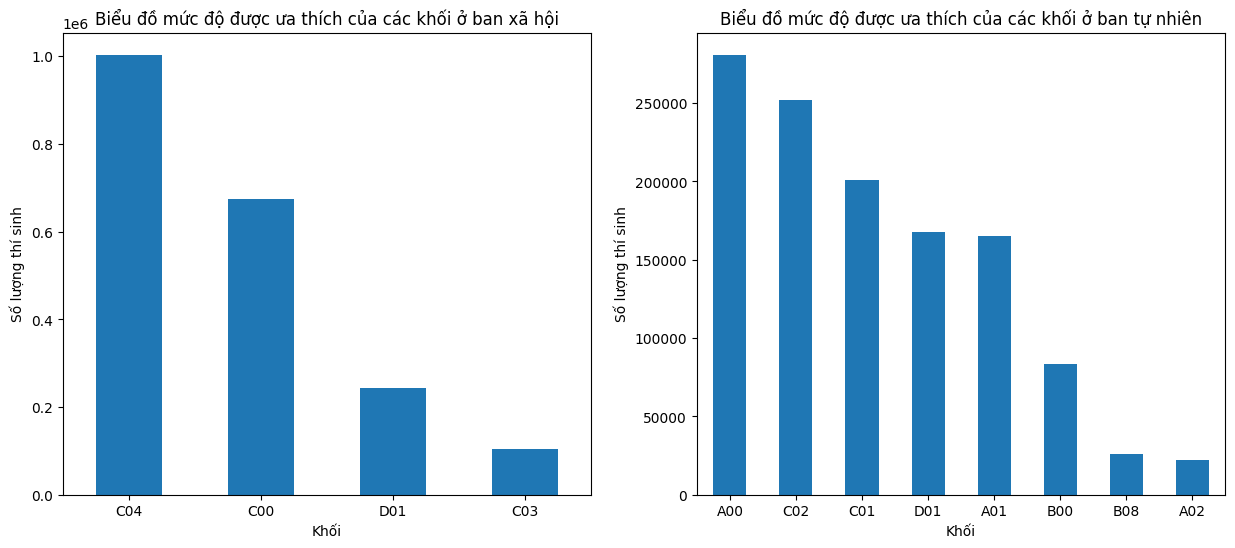

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
social_score.iloc[:, -1].value_counts().plot.bar(ax = ax[0])
nature_score.iloc[:, -1].value_counts().plot.bar(ax = ax[1])
ax[0].title.set_text('Biểu đồ mức độ được ưa thích của các khối ở ban xã hội')
ax[1].title.set_text('Biểu đồ mức độ được ưa thích của các khối ở ban tự nhiên')

ax[0].set_xlabel('Khối')
ax[1].set_xlabel('Khối')

ax[0].set_ylabel('Số lượng thí sinh')
ax[1].set_ylabel('Số lượng thí sinh')

ax[0].tick_params(labelrotation = 0)
ax[1].tick_params(labelrotation = 0)

plt.show()

**Kết luận:** 
- Khối có số lượng thí sinh cao nhất trong ban XÃ HỘI là: C04
- Khối có số lượng thí sinh cao nhất trong ban TỰ NHIÊN là: A00

### Bây giờ ta sẽ thực hiện theo từng năm
#### Xuất 1 vài dữ liệu mẫu 2020, 2021

In [23]:
social_score_2020, nature_score_2020 = committee(years['2020'])
nature_score = max_total_score_exam(nature_score_2020, chosen)
nature_score.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,D01,C02,C01,B08,B00,A02,A01,A00,Điểm tổng,Khối thi dự đoán
4,2020,18014523,8.2,6.50,4.0,8.00,8.50,5.00,18.70,23.20,22.70,17.20,21.70,21.20,20.20,24.70,24.70,A00
9,2020,18014527,9.4,7.00,4.0,7.50,7.75,4.50,20.40,24.15,23.90,17.90,21.65,21.40,20.90,24.65,24.65,A00
11,2020,18014515,8.0,6.75,5.0,7.25,7.75,4.75,19.75,22.50,22.00,17.75,20.50,20.00,20.25,23.00,23.00,A00
13,2020,18014548,7.6,7.75,4.6,5.50,6.25,6.75,19.95,21.60,20.85,18.95,20.60,19.85,17.70,19.35,21.60,C02
15,2020,18014519,8.2,6.75,5.6,8.50,8.25,5.00,20.55,23.20,23.45,18.80,21.45,21.70,22.30,24.95,24.95,A00


In [24]:
social_score_2021, nature_score_2021 = committee(years['2021'])
social_score = max_total_score_exam(social_score_2021, chosen)
social_score.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Su,Dia,GDCD,D01,C04,C03,C00,Điểm tổng,Khối thi dự đoán
870486,2021,1000043,8.0,8.50,8.8,5.75,6.50,8.75,25.30,23.00,22.25,20.75,25.30,D01
870490,2021,1000180,8.8,8.50,9.6,5.25,7.25,8.00,26.90,24.55,22.55,21.00,26.90,D01
870492,2021,1000149,7.8,7.25,6.8,4.75,6.75,7.25,21.85,21.80,19.80,18.75,21.85,D01
870493,2021,1000172,3.2,6.75,6.4,2.25,6.50,5.75,16.35,16.45,12.20,15.50,16.45,C04
870494,2021,1000033,8.6,8.50,9.8,6.50,7.00,9.50,26.90,24.10,23.60,22.00,26.90,D01


#### Trực quan hóa dữ liệu điểm thi của các khối qua từng năm

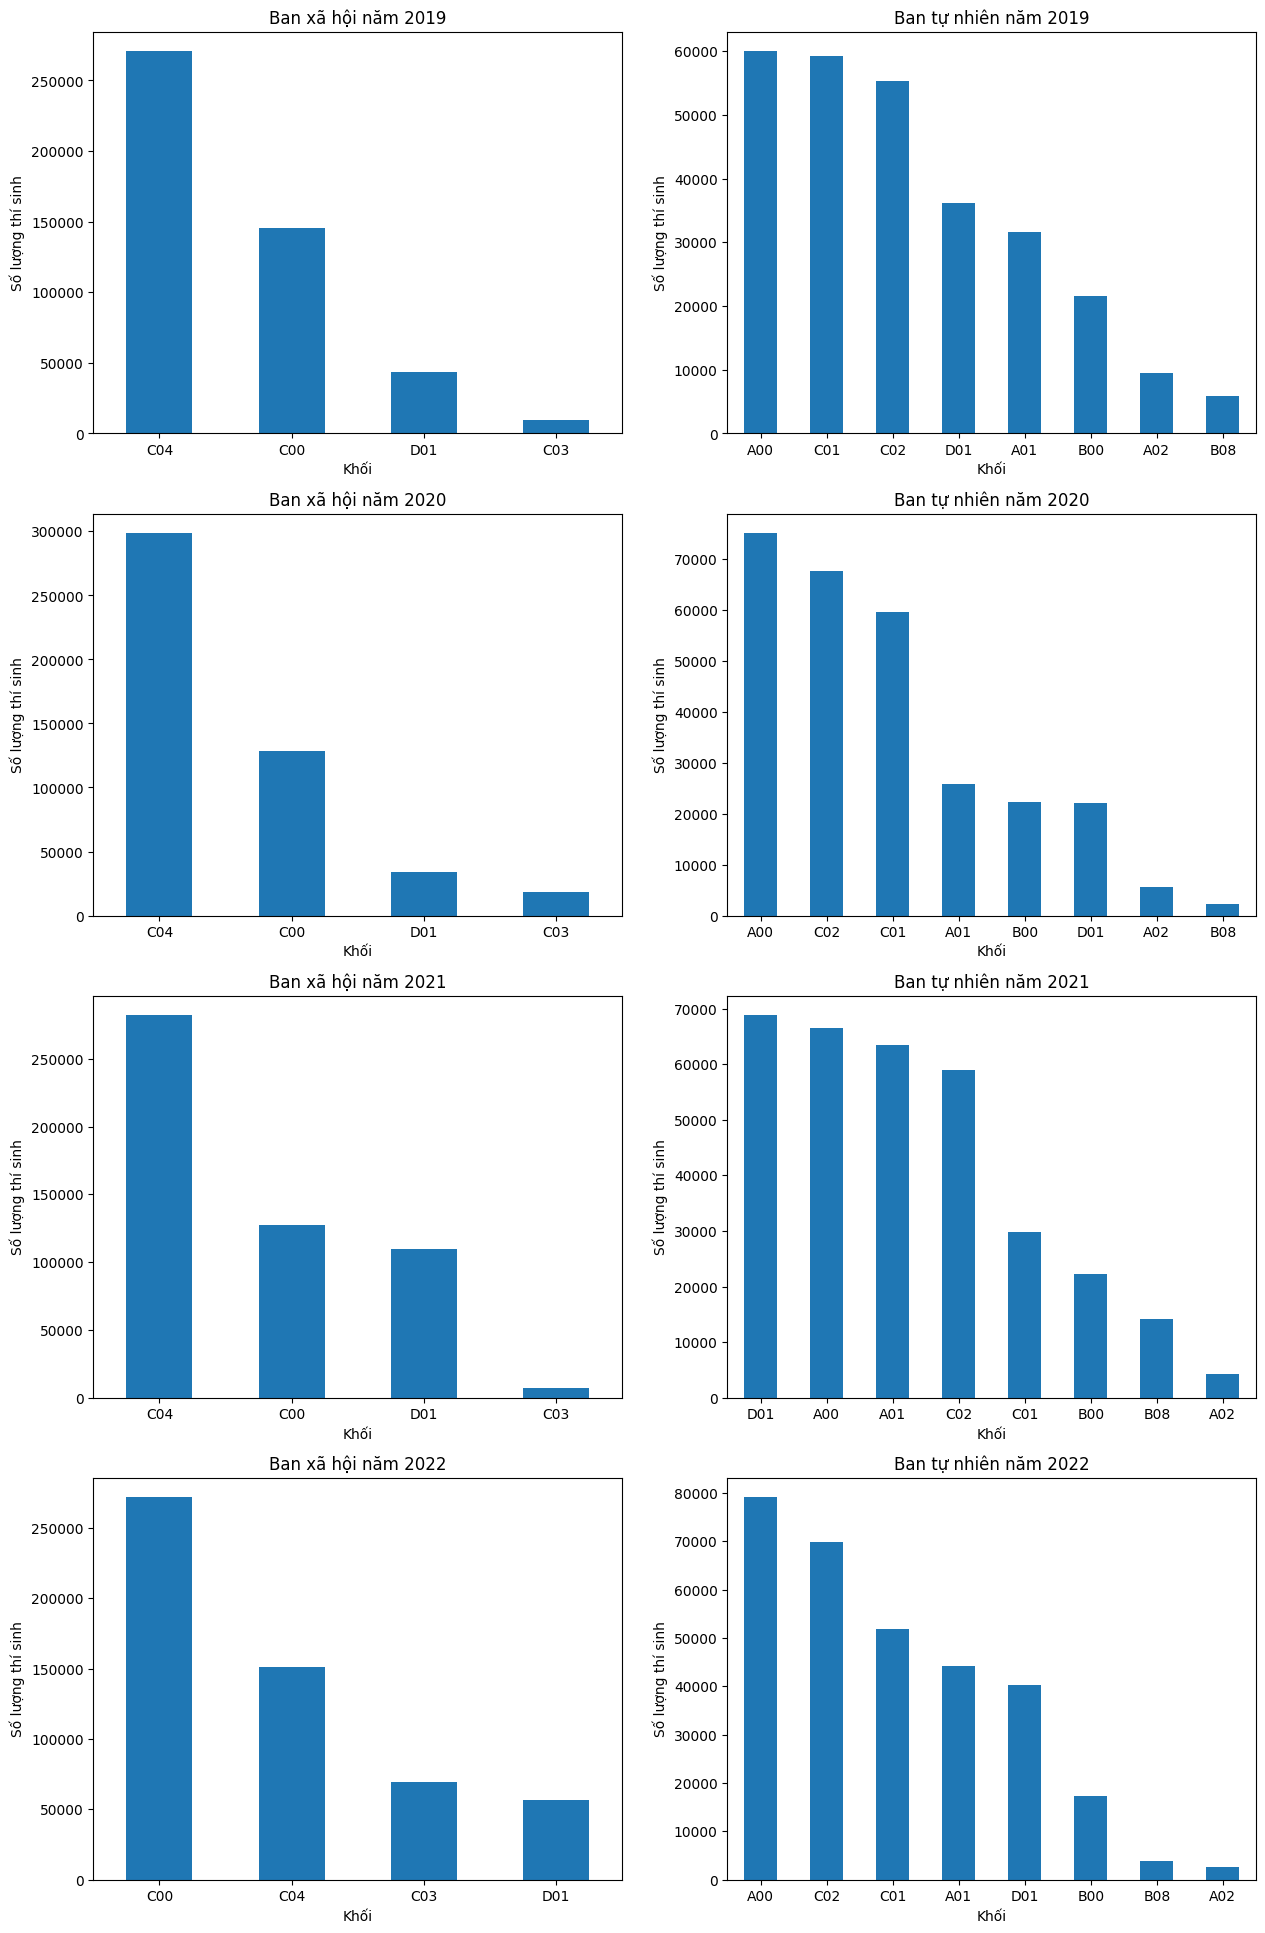

In [25]:
def visualization(years):
    fig, axes = plt.subplots(4, 2, figsize=(15,24))
    i = 0
    for year in years.keys():
        df = years[year]
        social_score_year, nature_score_year = committee(df)
        social_score_year = max_total_score_exam(social_score_year, chosen)
        nature_score_year = max_total_score_exam(nature_score_year, chosen)

        social_score_year.iloc[:, -1].value_counts().plot.bar(ax = axes[i][0])
        nature_score_year.iloc[:, -1].value_counts().plot.bar(ax = axes[i][1])

        axes[i][0].title.set_text('Ban xã hội năm ' + year)
        axes[i][1].title.set_text('Ban tự nhiên năm ' + year)

        axes[i][0].set_xlabel('Khối')
        axes[i][1].set_xlabel('Khối')

        axes[i][0].set_ylabel('Số lượng thí sinh')
        axes[i][1].set_ylabel('Số lượng thí sinh')

        axes[i][0].tick_params(labelrotation = 0)
        axes[i][1].tick_params(labelrotation = 0)
        i += 1

    plt.show()

visualization(years)

Để so sánh số lượng thí sinh lựa chọn khối nào nhiều nhất thì ta sẽ dùng biểu đồ cột để biểu diễn thay vì các biểu đồ khác, vì khi so sánh thì biểu đồ cột sẽ trực quan hóa rõ ràng nhất.

**NHẬN XÉT:**
- Ban xã hội: Năm 2019 đến 2022 thì Khối C00 vẫn luôn đứng đầu.
- Ban tự nhiên: Năm 2020 đến 2021 có sự thay đổi rõ rệt trong khối D01 từ top 6 năm 2020 thì khối D01 bỗng đứng đầu với top 1 năm 2021

**GIẢI THÍCH:**
Điểm khối D01 có thể tăng nhiều hơn so với mọi năm một phần có thể do điểm AV và điểm toán 2021 đã tăng hơn so với 2020, và điểm ngữ văn có thể là ổn hơn so với các môn khác nên khối D01 được ưa chuộng hơn các khối khác.

## 3. Nên bỏ cộng điểm ưu tiên khi xét tuyển đại học?

Hiện nay, có rất nhiều ý kiến tranh cãi về việc điểm cộng ưu tiên. Cộng điểm ưu tiên là thể hiện việc tính đến sự thiệt thòi của học sinh ở những vùng có điều kiện học thấp hơn. Một số khác lại lại có ý kiến "Thành phố cũng có khá nhiều hộ khó khăn không đủ trang thiết bị phương tiện cho con học". Vậy thì, có thực sự là sự chêch lệch điểm thi giữa các khối là lớn giữa các tỉnh thành hay không? Và điểm cộng có giúp công bằng hơn trong việc xét tuyển cao đẳng, đại học hay không.

Để trả lời câu hỏi trên, ta sẽ phân tích sự chệch lệch điểm giữa các tỉnh thành qua các khối xét tuyển của năm gần nhất (2022). Ở đây ta sẽ phân tích điểm các khối của một số tỉnh và so sánh nó với trung bình cả nước. Từ đó đưa ra những nhận định về sự chêch lệch điểm xét tuyển giữa các khối. Từ đó trả lời xem sự chêch lệch này có đủ để cân bằng bởi điểm cộng hay không?

Đầu tiên, đã đọc mã tỉnh và tên tỉnh từ `matinh.txt`.

In [26]:
f = open('../data/Matinh.txt', "r", encoding="utf-8")
f = f.read()
f = f.replace('\n','')
f = f.replace(' – ','  - ')
f = f.split("Mã tỉnh: ")
Matinh = {}
f.remove('')
for i in f:
    i = i.split(" - ")
    Matinh[int(i[0])] = i[1]

Tạo dataFrame `score` từ `social_score` và `nature_score`.

In [27]:
social_score_2022, nature_score_2022 = committee(years['2022'])
social_score = max_total_score_exam(social_score_2022, chosen)
nature_score = max_total_score_exam(nature_score_2022, chosen)
score = nature_score[["sbd","Điểm tổng","Khối thi dự đoán"]].append(social_score[["sbd","Điểm tổng","Khối thi dự đoán"]])
score["sbd"] = (score["sbd"]//1000000)
score.rename(columns = {'sbd':'MaTinh'}, inplace = True)

Tạo `dic_score` chứa trung bình điểm của các khối theo từng tỉnh.

In [28]:
dic_score = {}
avg_score = {}
list_col = sorted(score["Khối thi dự đoán"].unique())
for i in score["MaTinh"].unique():
    dic_score_temp = {}
    temp_core = score[score['MaTinh']==i]
    for j in list_col:
        dic_score_temp[j] = temp_core[temp_core["Khối thi dự đoán"] == j]["Điểm tổng"].sum()/temp_core[temp_core["Khối thi dự đoán"] == j]["Điểm tổng"].shape[0]
    avg_score[i] = temp_core["Điểm tổng"].sum()/temp_core["Điểm tổng"].shape[0]
    dic_score_temp["TB"] = avg_score[i]
    dic_score[i] = dic_score_temp
list_col = list(dic_score[1].keys())

Ta sẽ trực quan hoá 9 tỉnh trong 64 tỉnh để có được những nhận định khác quan nhất về sự chêch lệch của các tỉnh. 

Các tỉnh được chọn để trực quan là các tỉnh có thứ tự [1, 8, 16, 24, 32, 40, 48, 56, 64]. Tìm mã tỉnh của các tỉnh đó và lưu vào biến `index_vis`.

In [29]:
index_visual = []
for i in dict(sorted(avg_score.items(), key=lambda x: x[1], reverse= True)).keys():
    if i in [1, 8, 16, 24, 32, 40, 48, 56, 64]:
        index_visual.append(i)

Tính trung bình điểm các khối trên cả nước

In [30]:
avg_score_Khoi = {}
for i in list_col:
    avg_score_Khoi[i] = 0
    for j in score["MaTinh"].unique():
        avg_score_Khoi[i] += dic_score[j][i]
    avg_score_Khoi[i] /= 64

Trực quan hoá 9 tỉnh kể trên và trung bình của cả nước. Cùng với đó là so sánh với nhau để thấy được sự chêch lệch rõ nhất.

Để trực quan hoá 9 tỉnh cùng với điểm trung bình cả nước thì ta sẽ sử dùng biểu đồ cột và scatter để thấy rõ nhất sự tương quan đó.

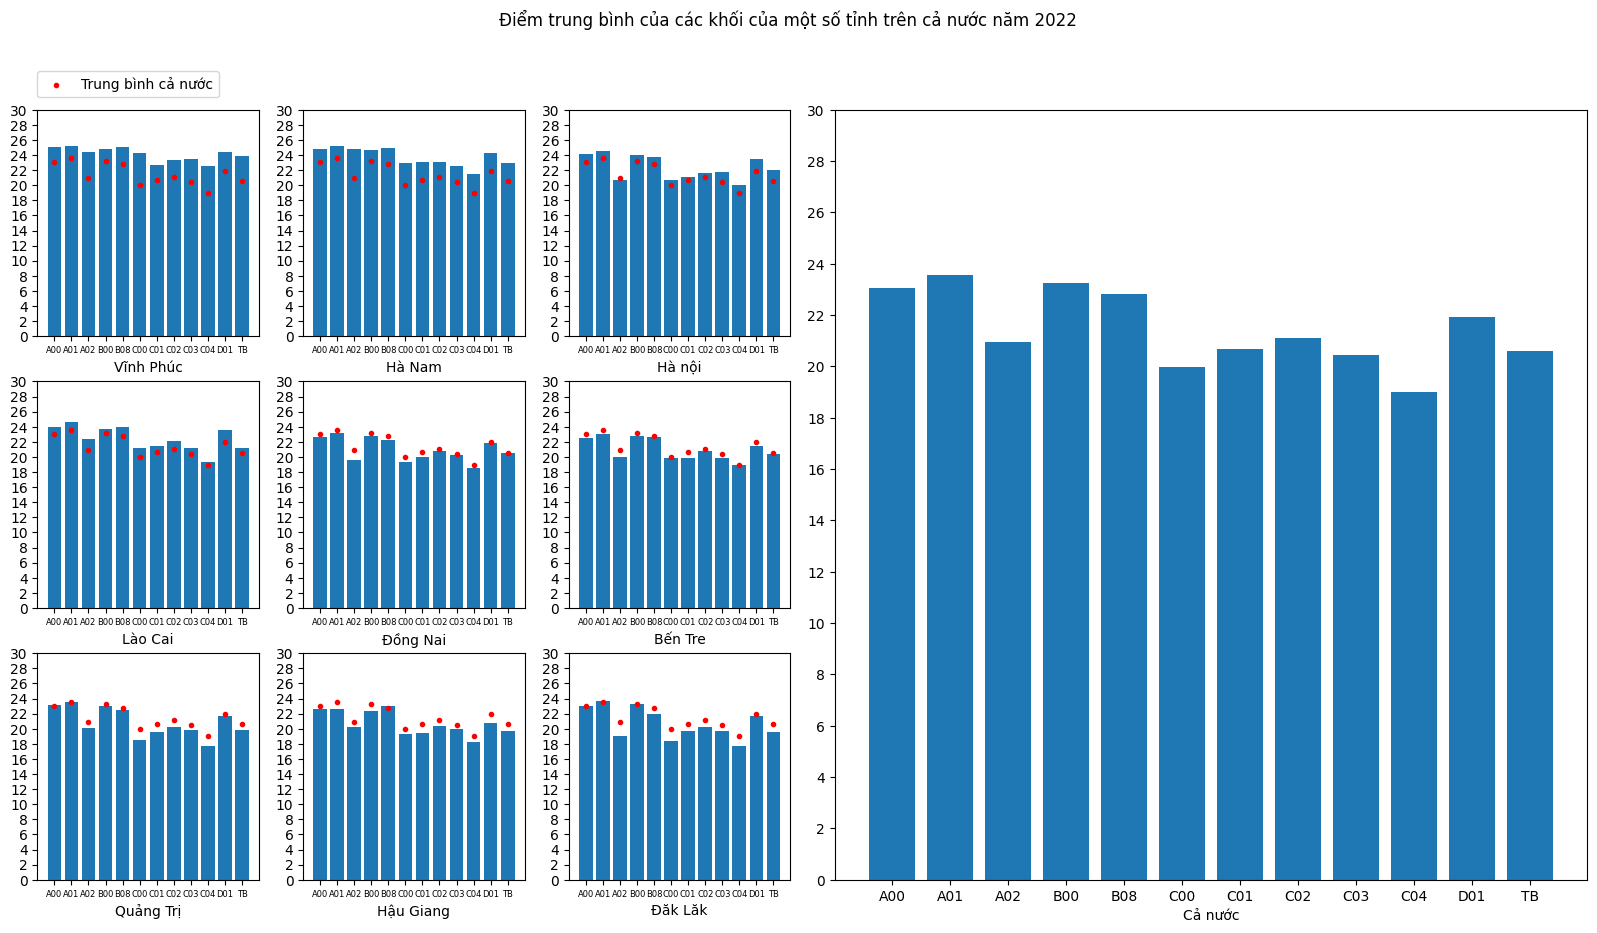

In [31]:
fig = plt.figure(figsize=(20,10))
ax = []
for i in range(0,9):
    ax.append(plt.subplot2grid((3, 6), (i//3,i % 3),colspan=1,rowspan=1))
ax.append(plt.subplot2grid((3, 6), (0, 3) ,colspan=3 ,rowspan=3))
for i in range(len(index_visual)):
    ax[i].bar(list_col,pd.Series(dic_score[index_visual[i]]))
    ax[i].scatter(list_col, pd.Series(avg_score_Khoi) , marker = '.', color = 'red', label = "Trung bình cả nước")
    ax[i].set_xlabel(Matinh[index_visual[i]])
    ax[i].set_xticklabels(list_col,fontsize = 6)
    ax[i].set_yticks(range(0,32,2))
ax[0].legend(bbox_to_anchor=(0.85,1.2))
ax[-1].bar(list_col,pd.Series(avg_score_Khoi))
ax[-1].set_xlabel("Cả nước")
ax[-1].set_yticks(range(0,32,2))
plt.suptitle("Điểm trung bình của các khối của một số tỉnh trên cả nước năm 2022")
plt.show()

## LỢI ÍCH TRẢ LỜI CÂU HỎI
- ***Câu hỏi 1:*** 
  - Theo các năm thì ban Xã Hội được lựa chọn nhiều hơn ban Tự Nhiên, tuy nhiên ban xã hội có ít lựa chọn trường học, ngành học hơn so với ban Tự Nhiên. Vậy nên sẽ có nhiều trường hợp không đậu đại học, hoặc rơi vào các nguyện vọng vớt không như mong muốn. 
  - Do đó, có thể sẽ có ngày càng nhiều thí sinh tự do hoặc tỉ lệ người thất nghiệp sau khi xét điểm đại học ngày càng tăng. Vậy nên ta phải nhanh chóng tìm giải pháp cho việc này nếu không muốn để lại hậu quả sau này.
- ***Câu hỏi 2:*** 
  - Xét điểm các khối giúp ta có thể biết được số lượng thí sinh lựa chọn một khối để đặt nguyện vọng học tập. Dựa vào điểm cao nhất mà thí sinh đạt được trong kì thi, ta có thể biết được thí sinh đó đã chú tâm vào môn nào, do đó sẽ đạt kết quả tốt nhất và đó chính là khối mà thí sinh lựa chọn. 
  - Dựa vào đó ta có thể biết được khối nào sẽ là khối được nhiều thí sinh lựa chọn nhất. Nếu có trường hợp một khối nào đó bổng nhiên có số lượng thí sinh nhảy vọt thì có khả năng cao là năm đó sẽ có nhiều thí sinh không đậu đại học, do tính cạnh tranh của khối đó sẽ tăng lên rất cao; tính cạnh tranh của các khối khác sẽ giảm xuống.
- ***Câu hỏi 3:***
  - Điểm trung bình theo khối của các tỉnh có sự chêch lệch khá nhiều. Ở những tỉnh có điểm cao thì điểm thi cao hơn điểm trung bình các khối của cả nước khá lớn khoảng từ 1,5-3 điểm. Ở những tỉnh có điểm chuẩn thấp thì thấp hơn khoảng từ 0,5-1,5 điểm. Sự chêch lệch điểm chuẩn diễn ra mạnh ở các tỉnh có điểm trung bình cao, còn các tỉnh còn lại thì sự chêch lệch là có nhưng không lệch quá nhiều như các tỉnh top đầu.
  - Các tỉnh có điểm chuẩn cao thường là các tỉnh có truyền thống học tập lâu đời,.., hoặc những thành phố lớn có điều kiện học tập tốt,... Các khu vực khác có điểm chuẩn thấp hơn thường là các tỉnh đồi núi hoặc các tỉnh còn khó khăn, chưa phát triển mạnh nên điều kiện học tập và truyền thống học tập chưa cao. Do đó điểm sẽ thấp hơn mặt bằng chung cả nước.
  - Để bù đắp cho những mặt chưa phát triển của các tỉnh thành khác thì điểm cộng là một giải pháp khá tốt. Những nó cũng mang lại những bất công ở một khía cạnh nào đó (không phải đứa trẻ nông thôn nào cũng khó khắn, không phải đứa trẻ thành thị nào cũng sung túc). Do đó, việc cân bằng điểm cộng để mang lại công bằng cho tất cả học sinh là một điều cần phải căn nhắc và sửa đổi.

**GIẢI PHÁP:**
- Hiện nay, theo quy chế tuyển sinh của Bộ Giáo dục và Đào tạo, từ năm 2023, thì việc cộng điểm chuẩn sẽ có sự thay đổi (điểm càng cao thì cộng càng ít). Em nghĩ đây là cũng một giải pháp khá tốt để mang lại công bằng trong tuyển sinh.
- Ngoài ra, một số ý kiến cho rằng, có thể giảm điểm cộng và thay vào đó là giảm học phí hoặc tăng học bổng cho các sinh viên đậu từ các vùng có điều kiện chưa tốt để khuyển khích việc học tập ở các vùng đó. Em thấy đây cũng là một giải pháp đang được xem xét.